# Part 1. Pitch & Problem Statement

### What are the Greenest Countries in the World, and why?

#### What can be learnt from these Nations, if anything, that can be applied to other nations further behind in the scoring used?

Using the dataset(s) provided by Yale https://epi.yale.edu/downloads, where they rank countries progress in this area using the EPI, 'Environmental Performance index', with added data from World Bank group https://data.worldbank.org/ and https://worldpopulationreview.com/ (for non-environmental data), can I predict EPI using different variables to build some helpful data that can give us insight.

# Part 2. Dataset & Data Collection

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV
import scipy.stats as stats
import statsmodels.api as sm
sns.set(font_scale=1.5)

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [2]:
# Environmental performance index Abbreviations Explained and later re-used for column renaming
abb = pd.read_csv(
    '/Users/Marc/Documents/DataScience/GA/DSI21-projects/EPI/Datasets/epi2020indicator.csv')
abb.head()

,Type,Abbreviation,Variable,Short name,Order
0,EPI,EPI,Environmental Performance Index,EPI,1
1,PolicyObjective,HLT,Environmental Health,Health,2
2,IssueCategory,AIR,Air Quality,Air Quality,3
3,Indicator,PMD,PM2.5 exposure,PM2.5,4
4,Indicator,HAD,Household solid fuels,Household solid fuels,5


In [3]:
# Environmental performance index: Global metrics for the environment: Ranking country performance on sustainability issues
ep = pd.read_csv(
    '/Users/Marc/Documents/DataScience/GA/DSI21-projects/EPI/Datasets/epi2020results.csv')
ep.head()

,country,region,Population 2020,GDP Per Capita,EPI.new,HLT.new,AIR.new,PMD.new,HAD.new,OZD.new,...,LCB.rnk.new,GIB.rnk.new,GHP.rnk.new,APE.rnk.new,SDA.rnk.new,NXA.rnk.new,AGR.rnk.new,SNM.rnk.new,WRS.rnk.new,WWT.rnk.new
0,Afghanistan,Southern Asia,38928341,517,25.5,20.0,17.7,25.4,7.3,16.9,...,1.0,77,1,179,176,176,48,48,134,134
1,Angola,Sub-Saharan Africa,32866268,1776,29.7,20.4,26.8,32.6,17.8,34.4,...,136.0,67,78,176,174,176,123,123,134,134
2,Albania,Eastern Europe,2837743,5246,49.0,44.5,41.2,44.2,34.6,60.1,...,26.0,130,87,1,1,1,94,94,92,92
3,United Arab Emirates,Greater Middle East,9890400,36285,55.6,55.2,48.6,13.9,100.0,18.8,...,151.0,165,172,46,1,69,169,169,21,21
4,Argentina,Latin America & Caribbean,45376763,8579,52.2,60.2,56.9,54.7,60.9,48.7,...,67.0,132,132,88,89,90,2,2,77,77


# Part 3. EDA & Preliminary Analysis

Quantitatively describe and visualise your data.

In [4]:
# abb['Short name']
new_columns_dict = {
    'country':'Country', 
    'region':'Region',
    'Population 2020':'Population', 
    'GDP Per Capita':'GDP',
    'EPI.new':'EPI',
    'HLT.new':'Health',
    'AIR.new':'Air',
    'PMD.new':'PM2.5',
    'HAD.new':'Household solid fuels',
    'OZD.new':'Ozone',
    'H2O.new':'Sanitation & Drinking Water',
    'USD.new':'Unsafe Sanitation',
    'UWD.new':'Unsafe Drinking water',
    'HMT.new':'Heavy Metals',
    'PBD.new':'Lead',
    'WMG.new':'Waste Management',
    'MSW.new':'Solid waste',
    'ECO.new':'Ecosystem Vitality',
    'BDH.new':'Biodiversity',
    'TBN.new':'Terrestrial biomes national',
    'TBG.new':'Terrestrial biomes global',
    'MPA.new':'Marine protected areas',
    'PAR.new':'Protected Areas Rep. Ind.',
    'SHI.new':'Species Habitat Index',
    'SPI.new':'Species Protection Index',
    'BHV.new':'Biodiversity Habitat Index',
    'ECS.new':'Ecosystem Services',
    'TCL.new':'Tree cover loss',
    'GRL.new':'Grassland loss',
    'WTL.new':'Wetland loss',
    'FSH.new':'Fisheries',
    'FSS.new':'Fish Stock Status',
    'RMS.new':'Marine Trophic Index',
    'FGT.new':'Fish caught by trawling',
    'CCH.new':'Climate Change',
    'CDA.new':'CO2 growth rate',
    'CHA.new':'CH4 growth rate',
    'FGA.new':'F-gas growth rate',
    'NDA.new':'N2O growth rate',
    'BCA.new':'Black Carbon growth rate',
    'LCB.new':'CO2 from land cover',
    'GIB.new':'GHG intensity trend',
    'GHP.new':'GHG per capita',
    'APE.new':'Pollution Emissions',
    'SDA.new':'SO2 growth rate',
    'NXA.new':'NOx growth rate',
    'AGR.new':'Agriculture',
    'SNM.new':'Sustainable N Mgmt Index',
    'WRS.new':'Water Resources',
    'WWT.new':'Wastewater treatment',
}

ep.rename(columns=new_columns_dict, inplace=True)

In [5]:
# Move predictor variable to the beginning
col = ep.pop('EPI')
ep.insert(0, col.name, col)
ep.head()
#ep.to_csv('ep.csv')

,EPI,Country,Region,Population,GDP,Health,Air,PM2.5,Household solid fuels,Ozone,...,LCB.rnk.new,GIB.rnk.new,GHP.rnk.new,APE.rnk.new,SDA.rnk.new,NXA.rnk.new,AGR.rnk.new,SNM.rnk.new,WRS.rnk.new,WWT.rnk.new
0,25.5,Afghanistan,Southern Asia,38928341,517,20.0,17.7,25.4,7.3,16.9,...,1.0,77,1,179,176,176,48,48,134,134
1,29.7,Angola,Sub-Saharan Africa,32866268,1776,20.4,26.8,32.6,17.8,34.4,...,136.0,67,78,176,174,176,123,123,134,134
2,49.0,Albania,Eastern Europe,2837743,5246,44.5,41.2,44.2,34.6,60.1,...,26.0,130,87,1,1,1,94,94,92,92
3,55.6,United Arab Emirates,Greater Middle East,9890400,36285,55.2,48.6,13.9,100.0,18.8,...,151.0,165,172,46,1,69,169,169,21,21
4,52.2,Argentina,Latin America & Caribbean,45376763,8579,60.2,56.9,54.7,60.9,48.7,...,67.0,132,132,88,89,90,2,2,77,77


In [6]:
# Didn't end up using this code as I changed from GDP to GDP per capita

# ep['GDP'] = ep['GDP'].div(1000000)
# ep['GDP'] = ep['GDP'].round(2)
# ep['Population'] = ep['Population'].div(1000000)
# ep['Population'] = ep['Population'].round(2)

In [7]:
# Split this into the 3 sections of the data, the new(2020) data(e.g EPI.new), the change over 10 years (e.g. EPI.change), and the rank (e.g. EPI.rnk.new). 

# ***I'll initially be working on 2020 data***

In [8]:
# EPI 2020
epi = ep.iloc[:,0:50]

In [9]:
# EPI 10 year change
epic1 = ep.iloc[:,0:5]
epic2 = ep.iloc[:,50:96]
epic = epic1.join(epic2)

In [10]:
# EPI Rank
epirank1 = ep.iloc[:,0:5]
epirank2 = ep.iloc[:,96:141]
epir = epirank1.join(epirank2)

In [11]:
# Gives quick overview of which Countries have highest EPI
# epi.sort_values('GDP', ascending=False, inplace=True)

In [12]:
epi.head()

,EPI,Country,Region,Population,GDP,Health,Air,PM2.5,Household solid fuels,Ozone,...,CO2 from land cover,GHG intensity trend,GHG per capita,Pollution Emissions,SO2 growth rate,NOx growth rate,Agriculture,Sustainable N Mgmt Index,Water Resources,Wastewater treatment
0,25.5,Afghanistan,Southern Asia,38928341,517,20.0,17.7,25.4,7.3,16.9,...,100.0,50.6,100.0,0.0,0.0,0.0,51.0,51.0,0.0,0.0
1,29.7,Angola,Sub-Saharan Africa,32866268,1776,20.4,26.8,32.6,17.8,34.4,...,27.2,53.9,60.3,2.6,5.2,0.0,29.3,29.3,0.0,0.0
2,49.0,Albania,Eastern Europe,2837743,5246,44.5,41.2,44.2,34.6,60.1,...,78.4,36.4,58.3,100.0,100.0,100.0,37.6,37.6,2.7,2.7
3,55.6,United Arab Emirates,Greater Middle East,9890400,36285,55.2,48.6,13.9,100.0,18.8,...,15.0,19.8,0.0,83.4,100.0,66.7,13.7,13.7,76.8,76.8
4,52.2,Argentina,Latin America & Caribbean,45376763,8579,60.2,56.9,54.7,60.9,48.7,...,57.8,36.2,29.8,59.3,67.3,51.3,78.4,78.4,5.9,5.9


In [13]:
# Know shape of dataset
epi.shape

(176, 50)

To address the small dataset, as this analysis was based on an individual datapoint per country (minus some countries with data so small / incomplete I had to drop them) that explains why this is so small (176 rows for each Country, as some countries were either too small or not enough data, thats why there is 176 vs 195)

In [14]:
epi.columns

Index(['EPI', 'Country', 'Region', 'Population', 'GDP', 'Health', 'Air',
       'PM2.5', 'Household solid fuels', 'Ozone',
       'Sanitation & Drinking Water', 'Unsafe Sanitation',
       'Unsafe Drinking water', 'Heavy Metals', 'Lead', 'Waste Management',
       'Solid waste', 'Ecosystem Vitality', 'Biodiversity',
       'Terrestrial biomes national', 'Terrestrial biomes global',
       'Marine protected areas', 'Protected Areas Rep. Ind.',
       'Species Habitat Index', 'Species Protection Index',
       'Biodiversity Habitat Index', 'Ecosystem Services', 'Tree cover loss',
       'Grassland loss', 'Wetland loss', 'Fisheries', 'Fish Stock Status',
       'Marine Trophic Index', 'Fish caught by trawling', 'Climate Change',
       'CO2 growth rate', 'CH4 growth rate', 'F-gas growth rate',
       'N2O growth rate', 'Black Carbon growth rate', 'CO2 from land cover',
       'GHG intensity trend', 'GHG per capita', 'Pollution Emissions',
       'SO2 growth rate', 'NOx growth rate', 'Agri

In [15]:
epi.dtypes

EPI                            float64
Country                         object
Region                          object
Population                       int64
GDP                              int64
Health                         float64
Air                            float64
PM2.5                          float64
Household solid fuels          float64
Ozone                          float64
Sanitation & Drinking Water    float64
Unsafe Sanitation              float64
Unsafe Drinking water          float64
Heavy Metals                   float64
Lead                           float64
Waste Management               float64
Solid waste                    float64
Ecosystem Vitality             float64
Biodiversity                   float64
Terrestrial biomes national    float64
Terrestrial biomes global      float64
Marine protected areas         float64
Protected Areas Rep. Ind.      float64
Species Habitat Index          float64
Species Protection Index       float64
Biodiversity Habitat Inde

In [16]:
# Gives quick overview of EPI per country
epi[['EPI', 'Country']].sort_values('EPI', ascending=False, inplace=False).head()

,EPI,Country
46,82.5,Denmark
99,82.3,Luxembourg
29,81.5,Switzerland
59,81.3,United Kingdom
56,80.0,France


In [17]:
# Gives quick overview of GDP
epi.sort_values('GDP', ascending=False, inplace=False)
epi.head()

,EPI,Country,Region,Population,GDP,Health,Air,PM2.5,Household solid fuels,Ozone,...,CO2 from land cover,GHG intensity trend,GHG per capita,Pollution Emissions,SO2 growth rate,NOx growth rate,Agriculture,Sustainable N Mgmt Index,Water Resources,Wastewater treatment
0,25.5,Afghanistan,Southern Asia,38928341,517,20.0,17.7,25.4,7.3,16.9,...,100.0,50.6,100.0,0.0,0.0,0.0,51.0,51.0,0.0,0.0
1,29.7,Angola,Sub-Saharan Africa,32866268,1776,20.4,26.8,32.6,17.8,34.4,...,27.2,53.9,60.3,2.6,5.2,0.0,29.3,29.3,0.0,0.0
2,49.0,Albania,Eastern Europe,2837743,5246,44.5,41.2,44.2,34.6,60.1,...,78.4,36.4,58.3,100.0,100.0,100.0,37.6,37.6,2.7,2.7
3,55.6,United Arab Emirates,Greater Middle East,9890400,36285,55.2,48.6,13.9,100.0,18.8,...,15.0,19.8,0.0,83.4,100.0,66.7,13.7,13.7,76.8,76.8
4,52.2,Argentina,Latin America & Caribbean,45376763,8579,60.2,56.9,54.7,60.9,48.7,...,57.8,36.2,29.8,59.3,67.3,51.3,78.4,78.4,5.9,5.9


In [18]:
epi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 50 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   EPI                          176 non-null    float64
 1   Country                      176 non-null    object 
 2   Region                       176 non-null    object 
 3   Population                   176 non-null    int64  
 4   GDP                          176 non-null    int64  
 5   Health                       176 non-null    float64
 6   Air                          176 non-null    float64
 7   PM2.5                        176 non-null    float64
 8   Household solid fuels        176 non-null    float64
 9   Ozone                        176 non-null    float64
 10  Sanitation & Drinking Water  176 non-null    float64
 11  Unsafe Sanitation            176 non-null    float64
 12  Unsafe Drinking water        176 non-null    float64
 13  Heavy Metals        

In [19]:
epi.isnull().sum()

EPI                              0
Country                          0
Region                           0
Population                       0
GDP                              0
Health                           0
Air                              0
PM2.5                            0
Household solid fuels            0
Ozone                            0
Sanitation & Drinking Water      0
Unsafe Sanitation                0
Unsafe Drinking water            0
Heavy Metals                     0
Lead                             0
Waste Management                 0
Solid waste                      0
Ecosystem Vitality               0
Biodiversity                     0
Terrestrial biomes national      0
Terrestrial biomes global        0
Marine protected areas          43
Protected Areas Rep. Ind.        0
Species Habitat Index           24
Species Protection Index        24
Biodiversity Habitat Index       0
Ecosystem Services               4
Tree cover loss                 12
Grassland loss      

In [20]:
print(epi.shape)
epi = epi.dropna(axis=1, how='any')
print(epi.shape)

(176, 50)
(176, 37)


In [21]:
# This shows the correlation of all variables to the EPI
epi.corr().sort_values('EPI', ascending=False)

,EPI,Population,GDP,Health,Air,PM2.5,Household solid fuels,Ozone,Sanitation & Drinking Water,Unsafe Sanitation,...,Black Carbon growth rate,GHG intensity trend,GHG per capita,Pollution Emissions,SO2 growth rate,NOx growth rate,Agriculture,Sustainable N Mgmt Index,Water Resources,Wastewater treatment
EPI,1.000000,-0.088416,0.797989,0.939378,0.886548,0.663350,0.850027,0.266475,0.915443,0.885503,...,0.561390,0.152587,-0.697718,0.728046,0.578908,0.725665,0.349069,0.349069,0.822353,0.822353
Health,0.939378,-0.074636,0.834596,1.000000,0.961203,0.725880,0.910160,0.351251,0.964191,0.941546,...,0.479412,0.054627,-0.712287,0.631249,0.514415,0.617133,0.258213,0.258213,0.807488,0.807488
Unsafe Drinking water,0.921150,-0.028185,0.792817,0.963767,0.866501,0.593163,0.881298,0.268153,0.992698,0.958687,...,0.489379,0.068336,-0.725379,0.633932,0.516506,0.619899,0.285153,0.285153,0.775600,0.775600
Sanitation & Drinking Water,0.915443,-0.034736,0.778425,0.964191,0.859227,0.561599,0.897741,0.276489,1.000000,0.985998,...,0.479632,0.056777,-0.751267,0.636139,0.525609,0.614942,0.268550,0.268550,0.765558,0.765558
Ecosystem Vitality,0.895579,-0.089490,0.604377,0.688747,0.627404,0.460778,0.616408,0.107874,0.684602,0.650732,...,0.565499,0.251923,-0.551059,0.720718,0.556988,0.733908,0.402684,0.402684,0.691133,0.691133
Air,0.886548,-0.113927,0.832173,0.961203,1.000000,0.843067,0.863363,0.388434,0.859227,0.828494,...,0.436035,0.038231,-0.621255,0.572341,0.457086,0.568549,0.215050,0.215050,0.778326,0.778326
Unsafe Sanitation,0.885503,-0.042986,0.739897,0.941546,0.828494,0.504392,0.898936,0.281215,0.985998,1.000000,...,0.454626,0.039684,-0.768831,0.623717,0.525471,0.593073,0.239059,0.239059,0.733312,0.733312
Household solid fuels,0.850027,-0.059397,0.766640,0.910160,0.863363,0.459599,1.000000,0.268844,0.897741,0.898936,...,0.377580,0.076643,-0.767903,0.597199,0.469352,0.600446,0.184958,0.184958,0.754984,0.754984
Climate Change,0.822478,-0.002023,0.541901,0.701658,0.628369,0.406730,0.651362,0.311653,0.700081,0.681285,...,0.616480,0.269768,-0.518675,0.711669,0.539358,0.734827,0.287568,0.287568,0.597965,0.597965
Water Resources,0.822353,-0.035913,0.799198,0.807488,0.778326,0.584425,0.754984,0.102646,0.765558,0.733312,...,0.439651,0.146340,-0.596569,0.615525,0.529817,0.574489,0.335141,0.335141,1.000000,1.000000


As you can see from above, most (not all) of the individual environmental indicators are highly correlated to the EPI.

In a sense, the EPI contains the info for all of the environmental indicators, as the many columns of environmental data we have are factored into the EPI score using weighting and aggregation...

https://epi.yale.edu/downloads/epi2020weights20200604.csv

As such, what I'll do now is drop the 32 individual environmental indicators, missing or otherwise, and just use one of the individual categories.

In [22]:
# Shows the issue categories which are main categories vs individual indicators
ic = (abb[abb['Type'] == 'IssueCategory'])
ic

,Type,Abbreviation,Variable,Short name,Order
2,IssueCategory,AIR,Air Quality,Air Quality,3
6,IssueCategory,H2O,Sanitation & Drinking Water,Sanitation & Drinking Water,7
9,IssueCategory,HMT,Heavy Metals,Heavy Metals,10
11,IssueCategory,WMG,Waste Management,Waste Management,12
14,IssueCategory,BDH,Biodiversity & Habitat,Biodiversity,15
22,IssueCategory,ECS,Ecosystem Services,Ecosystem Services,23
26,IssueCategory,FSH,Fisheries,Fisheries,27
30,IssueCategory,CCH,Climate Change,Climate Change,31
39,IssueCategory,APE,Pollution Emissions,Pollution Emissions,40
42,IssueCategory,AGR,Agriculture,Agriculture,43


In [23]:
epi.columns

Index(['EPI', 'Country', 'Region', 'Population', 'GDP', 'Health', 'Air',
       'PM2.5', 'Household solid fuels', 'Ozone',
       'Sanitation & Drinking Water', 'Unsafe Sanitation',
       'Unsafe Drinking water', 'Heavy Metals', 'Lead', 'Waste Management',
       'Solid waste', 'Ecosystem Vitality', 'Biodiversity',
       'Terrestrial biomes national', 'Terrestrial biomes global',
       'Protected Areas Rep. Ind.', 'Biodiversity Habitat Index',
       'Climate Change', 'CO2 growth rate', 'CH4 growth rate',
       'N2O growth rate', 'Black Carbon growth rate', 'GHG intensity trend',
       'GHG per capita', 'Pollution Emissions', 'SO2 growth rate',
       'NOx growth rate', 'Agriculture', 'Sustainable N Mgmt Index',
       'Water Resources', 'Wastewater treatment'],
      dtype='object')

In [24]:
epi = epi.drop(columns=["PM2.5", "Household solid fuels", "Ozone", "Unsafe Sanitation",
               "Unsafe Drinking water", 'Lead', 'Solid waste', 'Ecosystem Vitality', 'Terrestrial biomes national', 'Terrestrial biomes global',
       'Protected Areas Rep. Ind.', 'Biodiversity Habitat Index', 'CO2 growth rate', 'CH4 growth rate',
       'N2O growth rate', 'Black Carbon growth rate', 'GHG intensity trend',
       'GHG per capita', 'SO2 growth rate',
       'NOx growth rate', 'Agriculture','Sustainable N Mgmt Index','Wastewater treatment'])
epi.head()

,EPI,Country,Region,Population,GDP,Health,Air,Sanitation & Drinking Water,Heavy Metals,Waste Management,Biodiversity,Climate Change,Pollution Emissions,Water Resources
0,25.5,Afghanistan,Southern Asia,38928341,517,20.0,17.7,28.0,0.0,0.0,21.9,22.2,0.0,0.0
1,29.7,Angola,Sub-Saharan Africa,32866268,1776,20.4,26.8,12.8,37.3,0.0,39.3,49.0,2.6,0.0
2,49.0,Albania,Eastern Europe,2837743,5246,44.5,41.2,54.0,46.1,0.0,68.2,56.8,100.0,2.7
3,55.6,United Arab Emirates,Greater Middle East,9890400,36285,55.2,48.6,67.2,54.3,26.8,80.9,38.9,83.4,76.8
4,52.2,Argentina,Latin America & Caribbean,45376763,8579,60.2,56.9,64.7,73.1,44.6,49.1,60.2,59.3,5.9


In [25]:
epi = epi.join(epic["EPI.change"])
epi = epi.join(epir["EPI.rnk.new"])

In [26]:
# Move EPI change variable to the beginning
col = epi.pop("EPI.change")
epi.insert(1, col.name, col)

In [27]:
# Move EPI rank variable to the beginning
col = epi.pop("EPI.rnk.new")
epi.insert(2, col.name, col)
epi.head()

,EPI,EPI.change,EPI.rnk.new,Country,Region,Population,GDP,Health,Air,Sanitation & Drinking Water,Heavy Metals,Waste Management,Biodiversity,Climate Change,Pollution Emissions,Water Resources
0,25.5,5.0,178,Afghanistan,Southern Asia,38928341,517,20.0,17.7,28.0,0.0,0.0,21.9,22.2,0.0,0.0
1,29.7,5.3,158,Angola,Sub-Saharan Africa,32866268,1776,20.4,26.8,12.8,37.3,0.0,39.3,49.0,2.6,0.0
2,49.0,10.2,62,Albania,Eastern Europe,2837743,5246,44.5,41.2,54.0,46.1,0.0,68.2,56.8,100.0,2.7
3,55.6,11.3,42,United Arab Emirates,Greater Middle East,9890400,36285,55.2,48.6,67.2,54.3,26.8,80.9,38.9,83.4,76.8
4,52.2,5.0,54,Argentina,Latin America & Caribbean,45376763,8579,60.2,56.9,64.7,73.1,44.6,49.1,60.2,59.3,5.9


In [28]:
epi.rename(columns={'EPI.change':'EPIC', 'EPI.rnk.new':'EPI Rank'}, inplace=True)
epi.head()

,EPI,EPIC,EPI Rank,Country,Region,Population,GDP,Health,Air,Sanitation & Drinking Water,Heavy Metals,Waste Management,Biodiversity,Climate Change,Pollution Emissions,Water Resources
0,25.5,5.0,178,Afghanistan,Southern Asia,38928341,517,20.0,17.7,28.0,0.0,0.0,21.9,22.2,0.0,0.0
1,29.7,5.3,158,Angola,Sub-Saharan Africa,32866268,1776,20.4,26.8,12.8,37.3,0.0,39.3,49.0,2.6,0.0
2,49.0,10.2,62,Albania,Eastern Europe,2837743,5246,44.5,41.2,54.0,46.1,0.0,68.2,56.8,100.0,2.7
3,55.6,11.3,42,United Arab Emirates,Greater Middle East,9890400,36285,55.2,48.6,67.2,54.3,26.8,80.9,38.9,83.4,76.8
4,52.2,5.0,54,Argentina,Latin America & Caribbean,45376763,8579,60.2,56.9,64.7,73.1,44.6,49.1,60.2,59.3,5.9


In [29]:
epi.shape

(176, 16)

In [30]:
epi.head()

,EPI,EPIC,EPI Rank,Country,Region,Population,GDP,Health,Air,Sanitation & Drinking Water,Heavy Metals,Waste Management,Biodiversity,Climate Change,Pollution Emissions,Water Resources
0,25.5,5.0,178,Afghanistan,Southern Asia,38928341,517,20.0,17.7,28.0,0.0,0.0,21.9,22.2,0.0,0.0
1,29.7,5.3,158,Angola,Sub-Saharan Africa,32866268,1776,20.4,26.8,12.8,37.3,0.0,39.3,49.0,2.6,0.0
2,49.0,10.2,62,Albania,Eastern Europe,2837743,5246,44.5,41.2,54.0,46.1,0.0,68.2,56.8,100.0,2.7
3,55.6,11.3,42,United Arab Emirates,Greater Middle East,9890400,36285,55.2,48.6,67.2,54.3,26.8,80.9,38.9,83.4,76.8
4,52.2,5.0,54,Argentina,Latin America & Caribbean,45376763,8579,60.2,56.9,64.7,73.1,44.6,49.1,60.2,59.3,5.9


In [31]:
# This shows the correlation of all variables to the EPI. Now we have zero null values and all from EPI data are IssueCategories
epi.corr().sort_values('EPI', ascending=False)

,EPI,EPIC,EPI Rank,Population,GDP,Health,Air,Sanitation & Drinking Water,Heavy Metals,Waste Management,Biodiversity,Climate Change,Pollution Emissions,Water Resources
EPI,1.000000,0.425994,-0.966070,-0.088416,0.797989,0.939378,0.886548,0.915443,0.790854,0.803705,0.486947,0.822478,0.728046,0.822353
Health,0.939378,0.352077,-0.903457,-0.074636,0.834596,1.000000,0.961203,0.964191,0.832528,0.818873,0.284769,0.701658,0.631249,0.807488
Sanitation & Drinking Water,0.915443,0.396605,-0.903061,-0.034736,0.778425,0.964191,0.859227,1.000000,0.767922,0.784386,0.232031,0.700081,0.636139,0.765558
Air,0.886548,0.288457,-0.830218,-0.113927,0.832173,0.961203,1.000000,0.859227,0.807723,0.739620,0.311743,0.628369,0.572341,0.778326
Climate Change,0.822478,0.538974,-0.823980,-0.002023,0.541901,0.701658,0.628369,0.700081,0.595381,0.701577,0.247365,1.000000,0.711669,0.597965
Water Resources,0.822353,0.294179,-0.733717,-0.035913,0.799198,0.807488,0.778326,0.765558,0.724221,0.697752,0.347250,0.597965,0.615525,1.000000
Waste Management,0.803705,0.280535,-0.776410,-0.001475,0.647393,0.818873,0.739620,0.784386,0.667436,1.000000,0.240407,0.701577,0.540791,0.697752
GDP,0.797989,0.255534,-0.694707,-0.034923,1.000000,0.834596,0.832173,0.778425,0.723683,0.647393,0.291753,0.541901,0.544099,0.799198
Heavy Metals,0.790854,0.220296,-0.747816,-0.120777,0.723683,0.832528,0.807723,0.767922,1.000000,0.667436,0.282500,0.595381,0.546830,0.724221
Pollution Emissions,0.728046,0.481872,-0.718305,-0.044233,0.544099,0.631249,0.572341,0.636139,0.546830,0.540791,0.287085,0.711669,1.000000,0.615525


In [32]:
epi.columns

Index(['EPI', 'EPIC', 'EPI Rank', 'Country', 'Region', 'Population', 'GDP',
       'Health', 'Air', 'Sanitation & Drinking Water', 'Heavy Metals',
       'Waste Management', 'Biodiversity', 'Climate Change',
       'Pollution Emissions', 'Water Resources'],
      dtype='object')

In [33]:
epis = epi[['EPI','Health', 'Air', 'Sanitation & Drinking Water', 'Heavy Metals','Waste Management', 'Biodiversity', 'Climate Change',
           'Pollution Emissions', 'Water Resources']]

In [34]:
episs = epis.rename(columns={'Health':'Environmental Health', 'Air':'Air Quality'})

# Visual Analysis

Puts above correlation table in more visual format

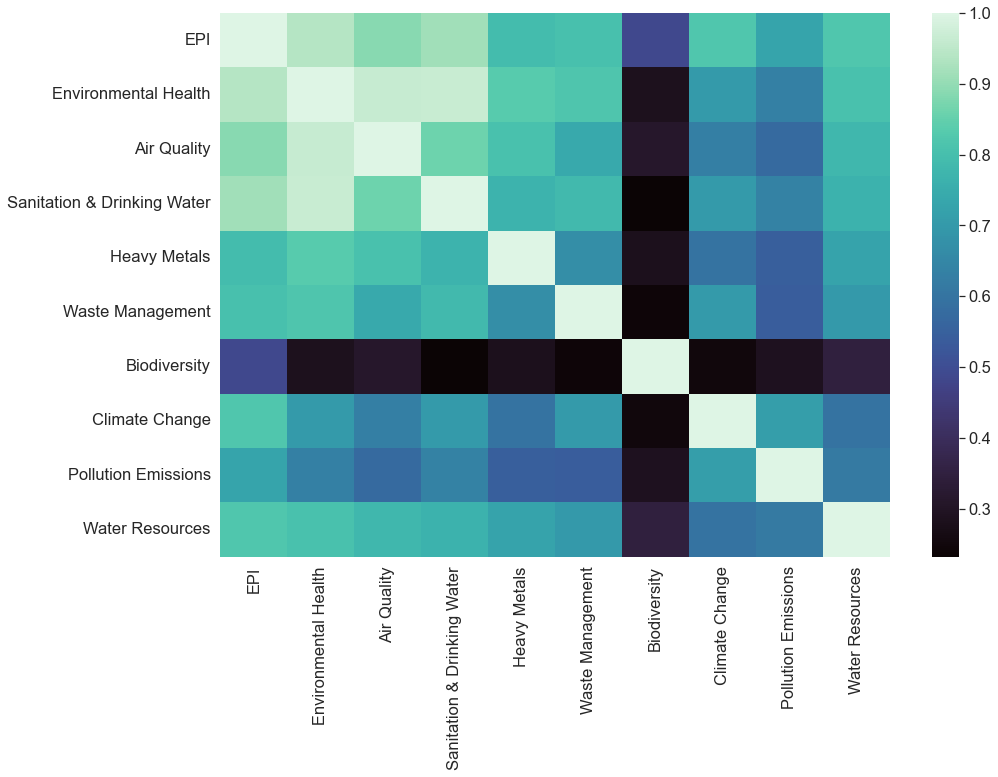

In [35]:
plt.figure(figsize = (15,10))
sns.heatmap(episs.corr(), cmap="mako")
plt.savefig("/Users/Marc/Documents/DataScience/GA/DSI21-projects/EPI/Images/epiheat.png")

Using a histogram to show the distribution

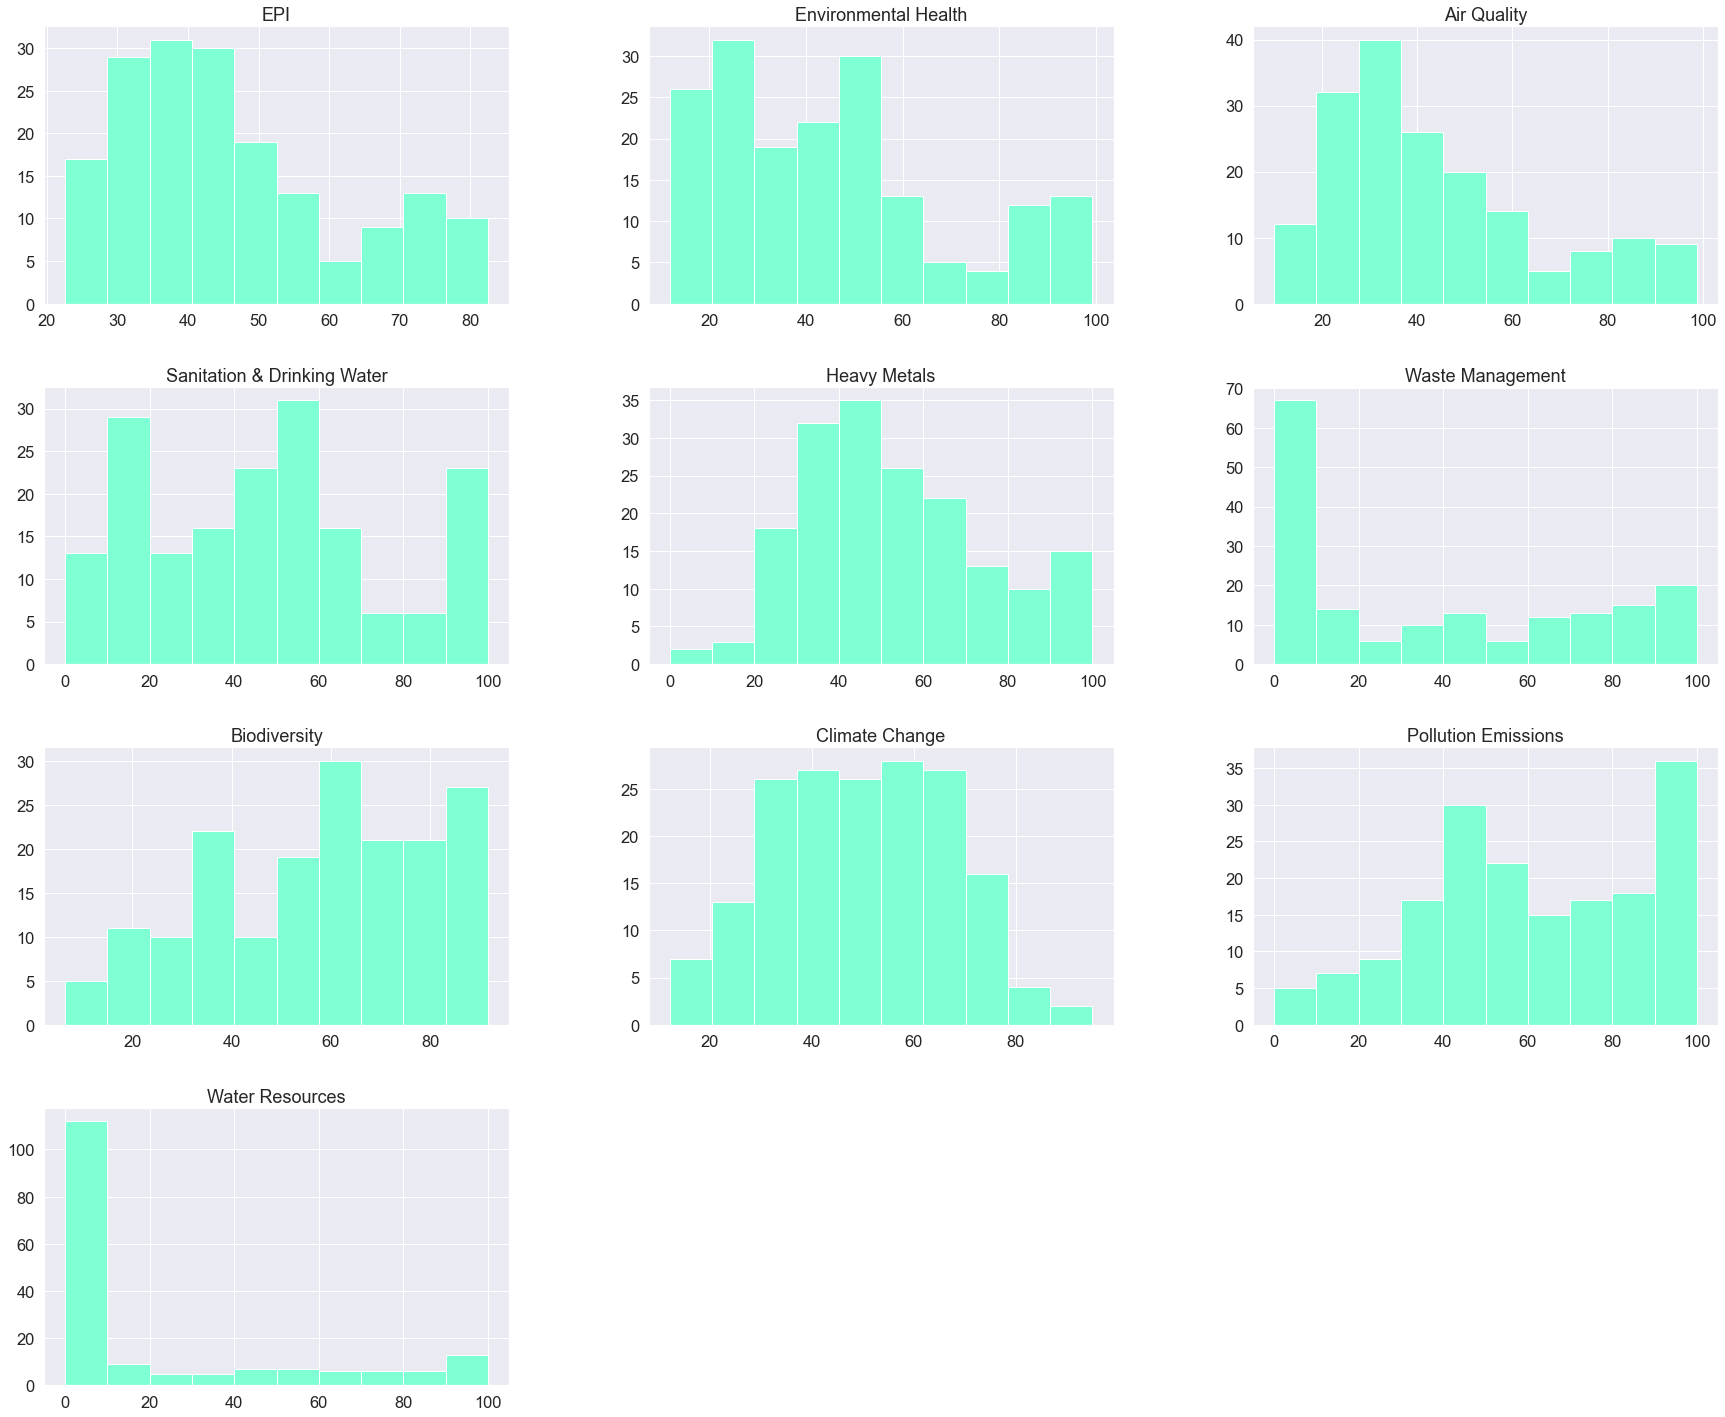

<Figure size 432x288 with 0 Axes>

In [36]:
episs.hist(bins=10, figsize =(30,25), color = "aquamarine")
plt.show()
plt.savefig("/Users/Marc/Documents/DataScience/GA/DSI21-projects/EPI/Images/epidist.png")

Slightly skewed

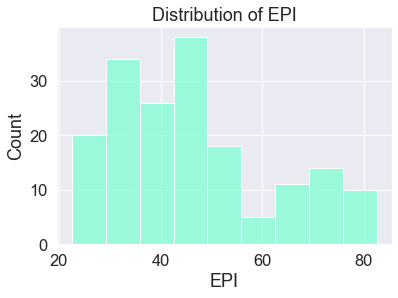

In [37]:
sns.histplot(epi['EPI'], color='aquamarine')
plt.title("Distribution of EPI");

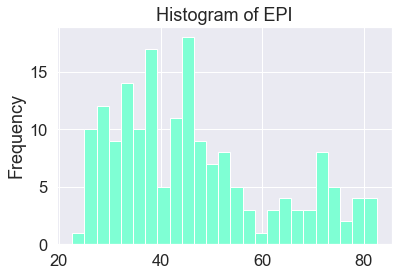

In [38]:
# plot hist of EPI = check distribution
epi.EPI.plot(kind='hist', bins=25,title='Histogram of EPI', xlabel='EPI', color='aquamarine');
plt.savefig("/Users/Marc/Documents/DataScience/GA/DSI21-projects/EPI/Images/epihist.png") 

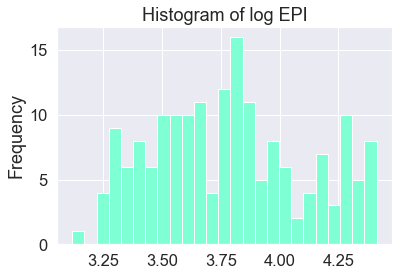

In [39]:
#Plot histogram of log EPI
epi['log_EPI'] = [np.log(x) for x in epi.EPI]
epi.log_EPI.plot(kind='hist', bins=25, title='Histogram of log EPI', xlabel='Log of EPI', color='aquamarine');
plt.savefig("/Users/Marc/Documents/DataScience/GA/DSI21-projects/EPI/Images/epihistlog.png")

Boxplot of the sale price with the observations, to look at the outliers

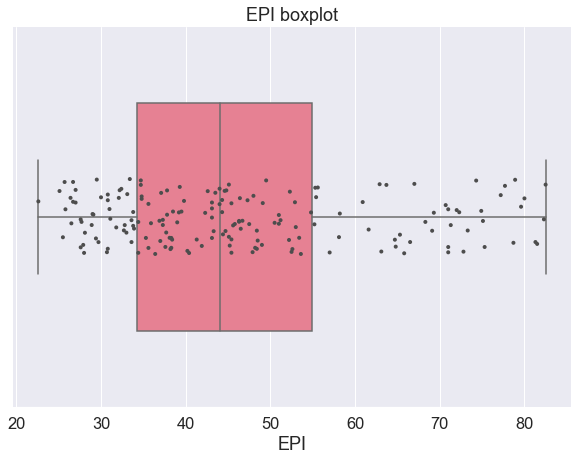

In [40]:
# Initialize the figure with
f, ax = plt.subplots(figsize=(10, 7))
# Plot the EPI with horizontal box
sns.boxplot(x="EPI", data=epi,
            whis=[0, 100], width=.6, palette="husl")
# Add in points to show each observation
sns.stripplot(x="EPI",  data=epi,
              size=4, color=".3", linewidth=0)
# Tweak the visual presentation
ax.set_title('EPI boxplot')
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

# Part 4: Findings & Technical Report

Explain your goals:

- As mentioned in the problem statement, can we use data to prescribe solutions being carried out by the environmentally more successful Coutries to the less successful Countries? And if not, why not? Already it is becoming clear a Countries Wealth plays a large part in how well they fare, can we find anything more specific than that?

Describe Modeling Choices:

- As the EPI score for 2020 is a continuous target variable, I'll be using regression models for this project.
- Starting with the below initial modelling, showing the linear regression and baseline for EPI vs GDP

# What Can We Take From This So Far?

- Distribution on my target (y) variable is a bit skewed. To combat this I could opt to use the EPI 10 year change data which is evenly distributed

# Simple Linear Regression (Without Train Test Split)

I mentioned in the problem statement that I'll use some different variables, please see the main ones I'll focus on, at least initially for some simple linear regression, and why...

- #### GDP ####
Yale themselves when releasing the annual EPI report for 2020 noted a strong relationship between how well a country performed on the EPI score and the countries wealth. This is also not directly related to any environmental variables
- #### Environmental Health ####
Being the highest correlated policy objective, and the highest correlated variable overall, this was a natural choice to dive deeper into with analysis
- #### Air Quality ####
Being the 2nd highest correlated variable thats type was 'Indicator' and also something that strongly comes to mind when thinking of environmental health (more so than the slightly higher correlated indicator of Sanitation & drinking water), I chose to do further analysis on this
- #### Population ####
Being negatively correlated and also not an environmental variable, thought it was worth digging into population more as a contrarian / red herring element to the analysis

#### GDP ####

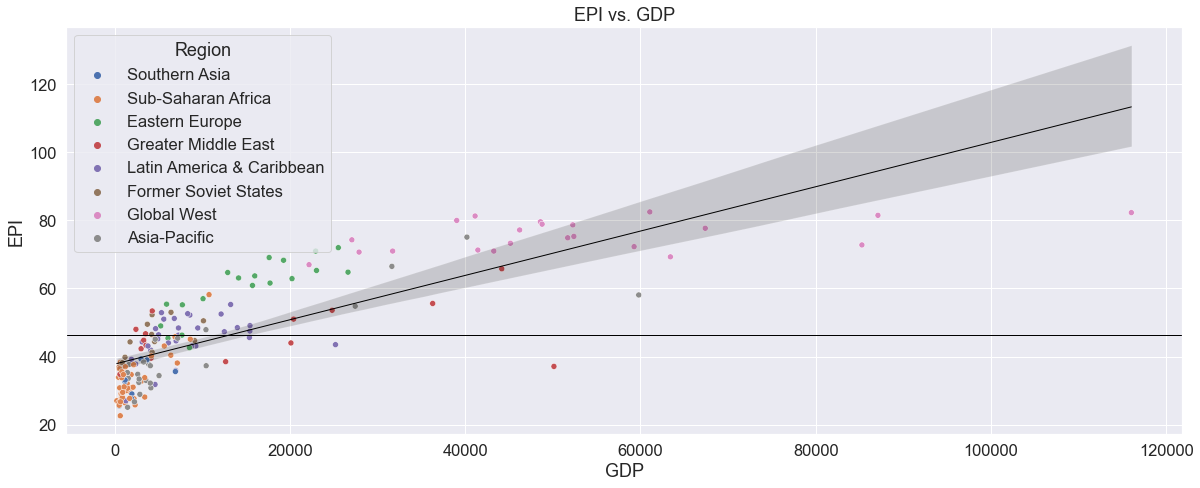

Intercept: 37.791082481165446
Coefficients: [0.00065146]
R2 Score: 0.6367859771246336
MSE: 87.37086949259141
RMSE: 9.347238602528098


<Figure size 432x288 with 0 Axes>

In [41]:
fig = plt.figure(figsize=(20,7.5))
ax = fig.gca()
sns.scatterplot(y=epi.EPI, x=epi.GDP, hue=epi.Region, legend='auto') # plt.scatter(X, y)
sns.regplot(y=epi.EPI, x=epi.GDP, data=epi, ax=ax, color='black', scatter=False, line_kws={'linewidth':1})
# With baseline added
plt.axhline(epi['EPI'].mean(), color='black', linewidth=1, label='Baseline')
# plt.axhline(epi['EPI'].max(), color='olive', linewidth=1)
plt.title("EPI vs. GDP")
plt.xlabel('GDP')
plt.ylabel('EPI')
plt.show()
# ------------------------ #
ygdp = epi.EPI
Xgdp = epi[['GDP']]
lrgdp = LinearRegression()
lrgdp.fit(Xgdp, ygdp) # X_Train, y_train later on
lrgdp.intercept_
lrgdp.coef_
lrgdp.score(Xgdp, ygdp)
print("Intercept:", lrgdp.intercept_)
print("Coefficients:", lrgdp.coef_)
# print("R2 Score:", (lrgdp.score(Xgdp, ygdp)))
# model predictions
predictionsgdp = lrgdp.predict(Xgdp)
print("R2 Score:", r2_score(ygdp, predictionsgdp))
# MSE
mean_squared_error(ygdp, predictionsgdp)
print("MSE:", mean_squared_error(ygdp, predictionsgdp))
print("RMSE:", np.sqrt(mean_squared_error(ygdp, predictionsgdp)))
# residuals
residualsgdp = ygdp - lrgdp.predict(Xgdp)
# print("Residuals:", residualsgdp)
plt.savefig("/Users/Marc/Documents/DataScience/GA/DSI21-projects/EPI/Images/epivsgdp.png")

### Environmental Health ###

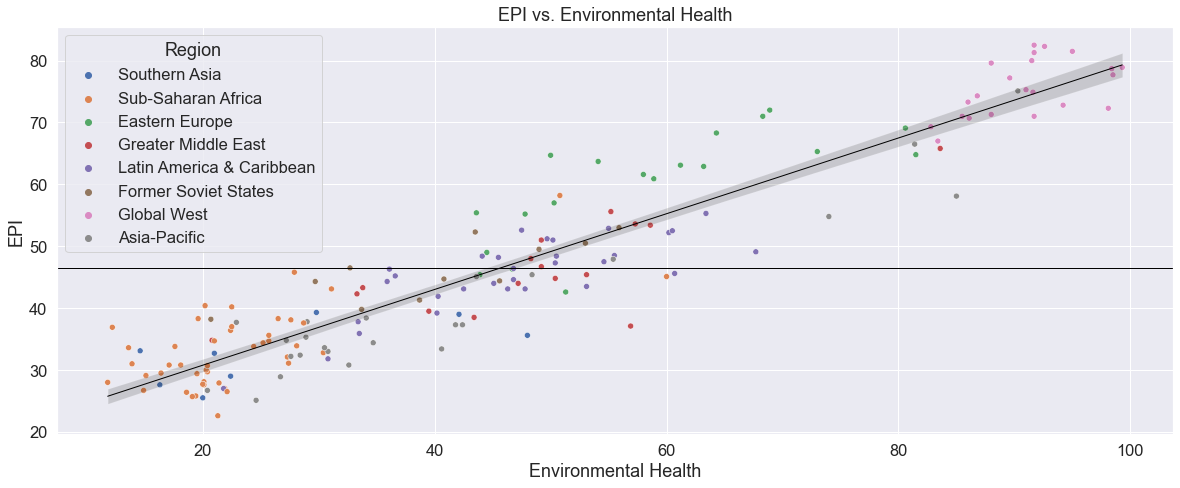

Intercept: 18.53273987604599
Coefficients: [0.61201765]
R2 Score: 0.8824308142430014
MSE: 28.281182273212377
RMSE: 5.318005478862576


<Figure size 432x288 with 0 Axes>

In [42]:
fig = plt.figure(figsize=(20,7.5))
ax = fig.gca()
sns.scatterplot(y=epi.EPI, x=epi.Health, hue=epi.Region, legend='auto') # plt.scatter(X, y)
sns.regplot(y=epi.EPI, x=epi.Health, data=epi, ax=ax, color='black', scatter=False, line_kws={'linewidth':1})
# With baseline added
plt.axhline(epi['EPI'].mean(), color='black', linewidth=1, label='Baseline')
# plt.axhline(epi['EPI'].max(), color='olive', linewidth=1)
plt.ylabel('EPI')
plt.xlabel('Environmental Health')
plt.title("EPI vs. Environmental Health")
plt.show()
# ------------------------ #
yh = epi.EPI
Xh = epi[['Health']]
lrh = LinearRegression()
lrh.fit(Xh, yh)
lrh.intercept_
lrh.coef_
lrh.score(Xh, yh)
print("Intercept:", lrh.intercept_)
print("Coefficients:", (lrh.coef_))
# model predictions
predictions = lrh.predict(Xh)
# calculate r2
r2_score(yh, predictions)
print("R2 Score:", r2_score(yh, predictions))
# MSE
mean_squared_error(yh, predictions)
print("MSE:", mean_squared_error(yh, predictions))
print("RMSE:", np.sqrt(mean_squared_error(yh, predictions)))
# Calculate residuals
residuals = yh - lrh.predict(Xh)
# print("Residuals: ", residuals)
plt.savefig("/Users/Marc/Documents/DataScience/GA/DSI21-projects/EPI/Images/epivshealth.png")

### Air Quality ###

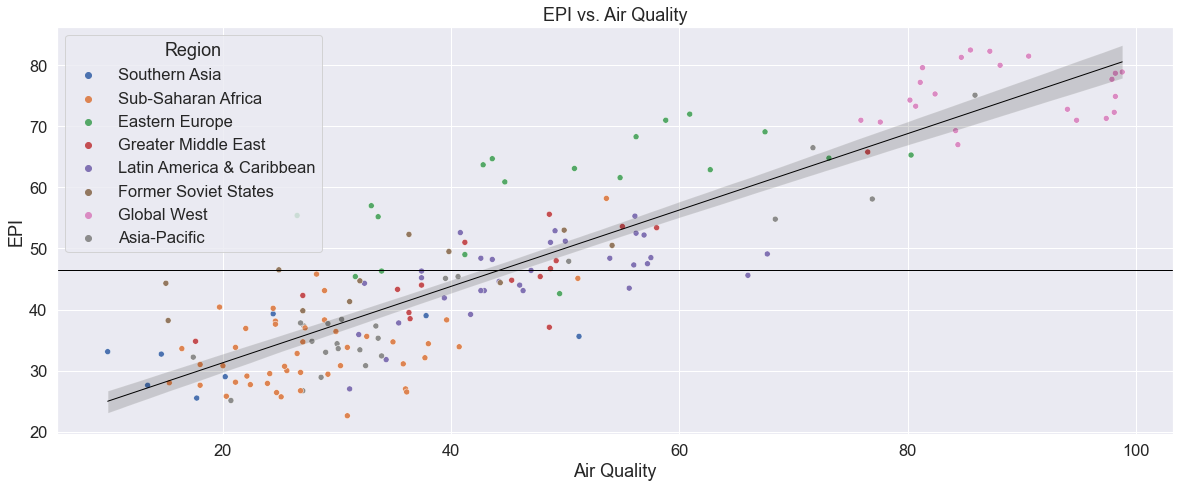

Intercept: 18.787964279692307
Coefficients: [0.62521411]
R2 Score: 0.785968107610423
MSE: 51.4852163173196
RMSE: 7.175319945293004


<Figure size 432x288 with 0 Axes>

In [43]:
fig = plt.figure(figsize=(20,7.5))
ax = fig.gca()
sns.scatterplot(y=epi.EPI, x=epi.Air, hue=epi.Region, legend='auto')
sns.regplot(y=epi.EPI, x=epi.Air, data=epi, ax=ax, color='black', scatter=False, line_kws={'linewidth':1})
# With baseline added
plt.axhline(epi['EPI'].mean(), color='black', linewidth=1, label='Baseline')
# plt.axhline(epi['EPI'].max(), color='olive', linewidth=1)
plt.ylabel('EPI')
plt.xlabel('Air Quality')
plt.title("EPI vs. Air Quality")
plt.show()
# ------------------------ #
ya = epi.EPI
Xa = epi[['Air']]
lra = LinearRegression()
lra.fit(Xa, ya)
lra.intercept_
lra.coef_
lra.score(Xa, ya)
print("Intercept:", lra.intercept_)
print("Coefficients:", lra.coef_)
# print("R2 Score:", (lra.score(Xa, ya)))
# model predictions
predictions = lra.predict(Xa)
# calculate r2
r2_score(ya, predictions)
print("R2 Score:", r2_score(ya, predictions))
# MSE
mean_squared_error(ya, predictions)
print("MSE:", mean_squared_error(ya, predictions))
print("RMSE:", np.sqrt(mean_squared_error(ya, predictions)))
# Calculate residuals
residuals = ya - lra.predict(Xa)
# print("Residuals: ", residuals)
plt.savefig("/Users/Marc/Documents/DataScience/GA/DSI21-projects/EPI/Images/epivsair.png")

### Population ###

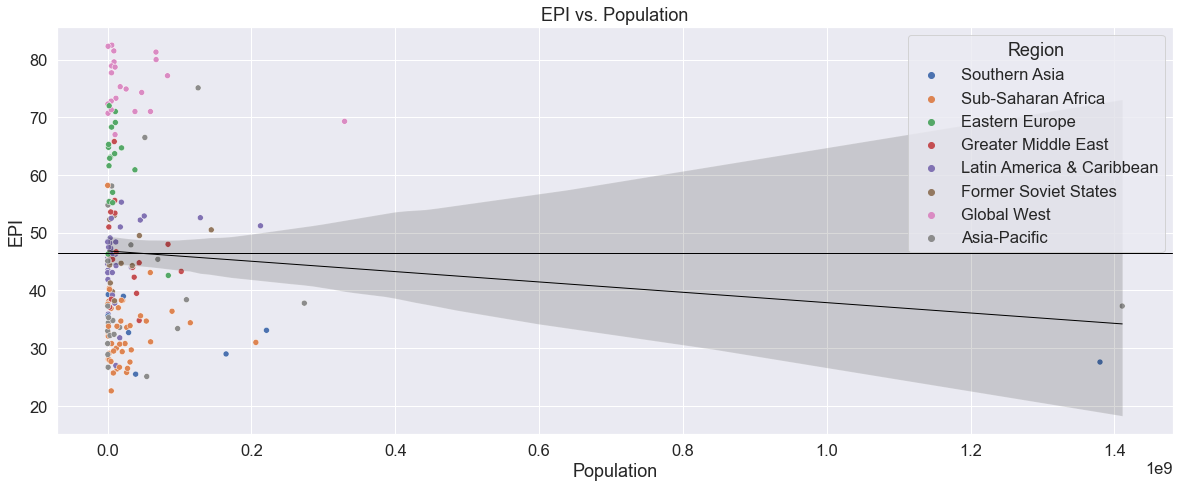

Intercept: 46.85213367826942
Coefficients: [-8.96295702e-09]
R2 Score: 0.007817451697785471
MSE: 238.6687916239559
RMSE: 15.448909075528793


In [44]:
# Negative correlation EPI vs population
fig = plt.figure(figsize=(20,7.5))
ax = fig.gca()
sns.scatterplot(y=epi.EPI, x=epi.Population, hue=epi.Region)
sns.regplot(y=epi.EPI, x=epi.Population, data=epi, ax=ax, color='black', scatter=False, line_kws={'linewidth':1})
plt.axhline(epi['EPI'].mean(), color='black', linewidth=1, label='Baseline')
# plt.axhline(epi['EPI'].max(), color='olive', linewidth=1)
plt.ylabel('EPI')
plt.xlabel('Population')
plt.title("EPI vs. Population")
plt.show()
# ------------------------ #
yp = epi.EPI
Xp = epi[['Population']]
lrp = LinearRegression()
lrp.fit(Xp, yp)
lrp.intercept_
lrp.coef_
lrp.score(Xp, yp)
print("Intercept:", lrp.intercept_)
print("Coefficients:", (lrp.coef_))
# print("R2 Score:", (lrp.score(Xp, yp)))
# model predictions
predictions = lrp.predict(Xp)
# calculate r2
r2_score(yp, predictions)
print("R2 Score:", r2_score(yp, predictions))
# MSE
mean_squared_error(yp, predictions)
print("MSE:", mean_squared_error(yp, predictions))
print("RMSE:", np.sqrt(mean_squared_error(yp, predictions)))
# Calculate residuals
residuals = yp - lrp.predict(Xp)
# print("Residuals: ", residuals)

# What Can We Take From This So Far?

As Pointed out by Yale themselves and as we can see from the data:

- There is a high correlation between a Countries wealth (GDP per capita in this case) and EPI score

- The Region (those being in the Global West faring the best), seems to have a positive correlation with EPI score, this is likely a further extension of Wealth

- Both the air quality and environmental health are strongly correlated, more so than the GDP

- Lastly, we have a negative correlation between EPI score and population, so I won't include population in any further analysis


## 1. Target & Predictors

I'll do some cross validation analysis on 3 predictors to find the most suitable parameters to use:

- Whole Dataset
- GDP
- And 3 selected predictors together (GDP, environmental health, air quality)...
- ...the same that I covered with simple linear regression just without population as we have already seen there is no correlation between that and the EPI

In [45]:
epi.columns

Index(['EPI', 'EPIC', 'EPI Rank', 'Country', 'Region', 'Population', 'GDP',
       'Health', 'Air', 'Sanitation & Drinking Water', 'Heavy Metals',
       'Waste Management', 'Biodiversity', 'Climate Change',
       'Pollution Emissions', 'Water Resources', 'log_EPI'],
      dtype='object')

In [46]:
# target
y = epi.EPI
# Whole Dataset
X = epi[['Country', 'Region', 'Health', 'Air', 'Sanitation & Drinking Water', 'Heavy Metals',
       'Waste Management', 'Biodiversity', 'Climate Change',
       'Pollution Emissions', 'Water Resources']]
# dummify
X = pd.get_dummies(X, columns=['Country', 'Region'], drop_first=True)
# baseline
print("Baseline:", np.mean(y))

Baseline: 46.46647727272729


In [47]:
# predictor GDP
X1 = epi[['GDP']]

In [48]:
# The Chosen Environmental
X2 = epi[['Health', 'Air', 'Sanitation & Drinking Water']]

## 2. Train Test Splits

In [49]:
# For Whole dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=3)

In [50]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(88, 191) (88,)
(88, 191) (88,)


In [51]:
X_train.head()

,Health,Air,Sanitation & Drinking Water,Heavy Metals,Waste Management,Biodiversity,Climate Change,Pollution Emissions,Water Resources,Country_Albania,...,Country_Viet Nam,Country_Zambia,Country_Zimbabwe,Region_Eastern Europe,Region_Former Soviet States,Region_Global West,Region_Greater Middle East,Region_Latin America & Caribbean,Region_Southern Asia,Region_Sub-Saharan Africa
9,32.7,24.9,45.5,41.0,0.0,56.9,48.6,100.0,3.8,0,...,0,0,0,0,1,0,0,0,0,0
146,47.8,33.6,65.5,51.1,44.7,57.4,68.1,89.0,1.7,0,...,0,0,0,1,0,0,0,0,0,0
128,50.4,56.0,43.5,57.5,42.0,60.4,50.3,66.1,23.1,0,...,0,0,0,0,0,0,0,1,0,0
29,95.0,90.6,100.0,95.0,99.0,63.0,81.6,100.0,96.7,0,...,0,0,0,0,0,1,0,0,0,0
39,60.5,56.2,66.1,53.8,64.8,70.1,54.8,33.6,9.7,0,...,0,0,0,0,0,0,0,1,0,0


In [52]:
y_train[:3]

9      46.5
146    55.2
128    47.3
Name: EPI, dtype: float64

In [53]:
X.mean()

Health                              45.642045
Air                                 44.270455
Sanitation & Drinking Water         47.426705
Heavy Metals                        53.075000
Waste Management                    37.603977
                                      ...    
Region_Global West                   0.125000
Region_Greater Middle East           0.090909
Region_Latin America & Caribbean     0.176136
Region_Southern Asia                 0.045455
Region_Sub-Saharan Africa            0.255682
Length: 191, dtype: float64

In [54]:
X_train.mean(), X_test.mean()

(Health                              45.938636
 Air                                 44.337500
 Sanitation & Drinking Water         47.744318
 Heavy Metals                        54.356818
 Waste Management                    39.036364
                                       ...    
 Region_Global West                   0.136364
 Region_Greater Middle East           0.090909
 Region_Latin America & Caribbean     0.159091
 Region_Southern Asia                 0.068182
 Region_Sub-Saharan Africa            0.250000
 Length: 191, dtype: float64,
 Health                              45.345455
 Air                                 44.203409
 Sanitation & Drinking Water         47.109091
 Heavy Metals                        51.793182
 Waste Management                    36.171591
                                       ...    
 Region_Global West                   0.113636
 Region_Greater Middle East           0.090909
 Region_Latin America & Caribbean     0.193182
 Region_Southern Asia         

In [55]:
# For GDP
X1_train, X1_test, y_train, y_test = train_test_split(
    X1, y, test_size=0.5, random_state=3)

In [56]:
print(X1_train.shape, y_train.shape)
print(X1_test.shape, y_test.shape)

(88, 1) (88,)
(88, 1) (88,)


In [57]:
X1_train.head()

,GDP
9,4221
146,7721
128,12510
29,87097
39,12141


In [58]:
X1.mean()

GDP    13316.909091
dtype: float64

In [59]:
X1_train.mean(), X1_test.mean()

(GDP    14486.329545
 dtype: float64,
 GDP    12147.488636
 dtype: float64)

In [60]:
# For chosen env variables
X2_train, X2_test, y_train, y_test = train_test_split(
    X2, y, test_size=0.5, random_state=3)

In [61]:
print(X2_train.shape, y_train.shape)
print(X2_test.shape, y_test.shape)

(88, 3) (88,)
(88, 3) (88,)


In [62]:
X2_train.head()

,Health,Air,Sanitation & Drinking Water
9,32.7,24.9,45.5
146,47.8,33.6,65.5
128,50.4,56.0,43.5
29,95.0,90.6,100.0
39,60.5,56.2,66.1


In [63]:
X2.mean()

Health                         45.642045
Air                            44.270455
Sanitation & Drinking Water    47.426705
dtype: float64

In [64]:
X2_train.mean(), X2_test.mean()

(Health                         45.938636
 Air                            44.337500
 Sanitation & Drinking Water    47.744318
 dtype: float64,
 Health                         45.345455
 Air                            44.203409
 Sanitation & Drinking Water    47.109091
 dtype: float64)

## 3. Standard Scalers

In [65]:
# whole dataset scaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

In [66]:
# gdp scaler
scaler1 = StandardScaler()
X1_train = scaler.fit_transform(X1_train)
X1_test = scaler.transform(X1_test)
X1_train = pd.DataFrame(X1_train, columns=X1.columns)
X1_test = pd.DataFrame(X1_test, columns=X1.columns)

In [67]:
# chosen variables scaler
scaler2 = StandardScaler()
X2_train = scaler.fit_transform(X2_train)
X2_test = scaler.transform(X2_test)
X2_train = pd.DataFrame(X2_train, columns=X2.columns)
X2_test = pd.DataFrame(X2_test, columns=X2.columns)

## Simple Linear Regression With Train Test Split 

### For Predictor X (Whole Dataset)

In [68]:
model = LinearRegression()
# fit and evaluate the data on the whole training set
model.fit(X_train, y_train)
# get cross validated scores
scores = cross_val_score(model, X_train, y_train, cv=5)
print("Cross-validated training scores:", scores)
print("Mean cross-validated training score:", scores.mean())
print("R2 Training Score:", model.score(X_train, y_train))
# evaluate the data on the test set
print("R2 Test Score:", model.score(X_test, y_test))
predictions = cross_val_predict(model, X, y, cv=5)
# print("Predictions:", predictions)

Cross-validated training scores: [0.95113462 0.90810977 0.96324214 0.94442552 0.92351089]
Mean cross-validated training score: 0.9380845861305176
R2 Training Score: 1.0
R2 Test Score: 0.9529547422892692


### For Predictors X1 (GDP)

In [69]:
model1 = LinearRegression()
# get cross validated scores
scores = cross_val_score(model1, X1_train, y_train, cv=5)
print("Cross-validated training scores:", scores)
print("Mean cross-validated training score:", scores.mean())
# fit and evaluate the data on the whole training set
model1.fit(X1_train, y_train)
print("R2 Training Score:", model1.score(X1_train, y_train))
# evaluate the data on the test set
print("R2 Test Score:", model1.score(X1_test, y_test))

Cross-validated training scores: [0.65810011 0.13365248 0.72374218 0.78728179 0.41866352]
Mean cross-validated training score: 0.5442880172199965
R2 Training Score: 0.6302274802283054
R2 Test Score: 0.6291965349101571


### For Predictors X2 (Selected Variables)

In [70]:
model2 = LinearRegression()
# get cross validated scores
scores = cross_val_score(model2, X2_train, y_train, cv=5)
print("Cross-validated training scores:", scores)
print("Mean cross-validated training score:", scores.mean())
# fit and evaluate the data on the whole training set
model2.fit(X2_train, y_train)
print("R2 Training Score:", model2.score(X2_train, y_train))
# evaluate the data on the test set
print("R2 Test Score:", model2.score(X2_test, y_test))

Cross-validated training scores: [0.93252213 0.83552613 0.84429529 0.91724971 0.79857775]
Mean cross-validated training score: 0.8656342037878607
R2 Training Score: 0.8920079387821854
R2 Test Score: 0.8782414119245723


# Evaluation

My selected variables (GDP, Environmental Health, Air Quality) had the highest R2 score out of all that I ran analysis on. Higher than the whole dataset together and higher than the singular financial variable of GDP alone.

This tells us that while a Countries wealth can help fund green improvements and therefore push up the EPI score; an already high environmental health / Air Quality can trump just the financial side alone. May be late pointing this out, and maybe stating the obvious, but this tells us prevention trumps a cure, as it were.

# Regularisation with Ridge

My cross-validation / train test analysis has assisted me in defining which parameters out of the whole dataset are most suitable. Now I'll look at some regularization methods to give the models more generalizability

#### Whole Dataset

In [84]:
model_r = Ridge(alpha=alpha)
alpha = model_r.alpha

In [85]:
# Whole dataset
# create a Ridge model instance
model_r = Ridge(alpha=alpha)
alpha = model_r.alpha
# get cross validated scores
scores = cross_val_score(model_r, X_train, y_train, cv=5)
print("Cross-validated training scores:", scores)
print("Mean cross-validated training score:", scores.mean())
# fit and evaluate the data on the whole training set
model_r.fit(X_train, y_train)
print("Training Score:", model_r.score(X_train, y_train))
# evaluate the data on the test set
print("Test Score:", model_r.score(X_test, y_test))
print("Cross-Predicted R2:", r2_score(y, predictions))

Cross-validated training scores: [0.95087248 0.91296735 0.96909353 0.94836835 0.92595789]
Mean cross-validated training score: 0.9414519198350815
Training Score: 0.999999988638949
Test Score: 0.9531871334926626
Cross-Predicted R2: 0.9850549177703876


In [86]:
model_r1 = Ridge(alpha=alpha)
alpha = model_r1.alpha

In [87]:
# X2 (Selected variables)
# create a Ridge model instance
model_r1 = Ridge(alpha=alpha)
alpha = model_r1.alpha
# get cross validated scores
scores = cross_val_score(model_r1, X2_train, y_train, cv=5)
print("Cross-validated training scores:", scores)
print("Mean cross-validated training score:", scores.mean())
# fit and evaluate the data on the whole training set
model_r1.fit(X2_train, y_train)
print("Training Score:", model_r1.score(X2_train, y_train))
# evaluate the data on the test set
print("Test Score:", model_r1.score(X2_test, y_test))
print("Cross-Predicted R2:", r2_score(y, predictions))

Cross-validated training scores: [0.93275121 0.84530517 0.84375904 0.91525107 0.79628435]
Mean cross-validated training score: 0.8666701669269875
Training Score: 0.8918116556082158
Test Score: 0.875880403544505
Cross-Predicted R2: 0.9850549177703876


## Ridge CV

In [75]:
# Whole dataset
# creating a RidgeCV model instance
model_r = RidgeCV(alphas=np.logspace(-4, 4, 10), cv=5)
# fit the model
model_r.fit(X_train, y_train)
# get the best alpha
print('Best alpha:', model_r.alpha_)
# evaluate on the training set
print('Training score:', model_r.score(X_train, y_train))
# evaluate on the test set
print("Test Score:", model_r.score(X_test, y_test))

Best alpha: 0.0001
Training score: 0.9999999999999473
Test Score: 0.9532002667736282


In [76]:
# gdp
# creating a RidgeCV model instance
model_r = RidgeCV(alphas=np.logspace(-4, 4, 10), cv=5)
# fit the model
model_r.fit(X1_train, y_train)
# get the best alpha
print('Best alpha:', model_r.alpha_)
# evaluate on the training set
print('Training score:', model_r.score(X1_train, y_train))
# evaluate on the test set
print("Test Score:", model_r.score(X1_test, y_test))

Best alpha: 2.782559402207126
Training score: 0.6296353988802939
Test Score: 0.6242215293172193


In [77]:
# X2 (Selected variables)
# creating a RidgeCV model instance
model_r1 = RidgeCV(alphas=np.logspace(-4, 4, 10), cv=5)
# fit the model
model_r1.fit(X2_train, y_train)
# get the best alpha
print('Best alpha:', model_r1.alpha_)
# evaluate on the training set
print('Training score:', model_r1.score(X2_train, y_train))
# evaluate on the test set
print("Test Score:", model_r1.score(X2_test, y_test))

Best alpha: 0.046415888336127774
Training score: 0.8918116556082158
Test Score: 0.875880403544505


# Regularisation with Lasso

In [78]:
# Whole dataset

# create a LassoCV model instance
model_lasso = LassoCV(alphas=np.logspace(-4, 4, 10), cv=5)
# fit the model
model_lasso.fit(X_train, y_train)
# get the best alpha
print('Best alpha:', model_lasso.alpha_)

alpha = model_lasso.alpha_
# create a Lasso model instance
model_lasso = Lasso(alpha=alpha)

# get cross validated scores
scores = cross_val_score(model_lasso, X_train, y_train, cv=5)
print("Cross-validated training scores:", scores)
print("Mean cross-validated training score:", scores.mean())
# fit and evaluate the data on the whole training set
model_lasso.fit(X_train, y_train)
print("Training Score:", model_lasso.score(X_train, y_train))
# evaluate the data on the test set
print("Test Score:", model_lasso.score(X_test, y_test))

Best alpha: 0.3593813663804626
Cross-validated training scores: [0.98926054 0.96507003 0.98668813 0.98625558 0.96786704]
Mean cross-validated training score: 0.9790282642260028
Training Score: 0.9890330403814904
Test Score: 0.9832506637983396


In [79]:
# GDP

# create a LassoCV model instance
model_lasso = LassoCV(alphas=np.logspace(-4, 4, 10), cv=5)
# fit the model
model_lasso.fit(X1_train, y_train)
# get the best alpha
print('Best alpha:', model_lasso.alpha_)

alpha = model_lasso.alpha_
# create a Lasso model instance
model_lasso = Lasso(alpha=alpha)

# get cross validated scores
scores = cross_val_score(model_lasso, X1_train, y_train, cv=5)
print("Cross-validated training scores:", scores)
print("Mean cross-validated training score:", scores.mean())
# fit and evaluate the data on the whole training set
model_lasso.fit(X1_train, y_train)
print("Training Score:", model_lasso.score(X1_train, y_train))
# evaluate the data on the test set
print("Test Score:", model_lasso.score(X1_test, y_test))

Best alpha: 0.3593813663804626
Cross-validated training scores: [0.65046032 0.17681537 0.71616218 0.77810741 0.41740811]
Mean cross-validated training score: 0.5477906777663246
Training Score: 0.6297440697974499
Test Score: 0.624740807625229


In [80]:
# Selected Variables

# create a LassoCV model instance
model_lasso = LassoCV(alphas=np.logspace(-4, 4, 10), cv=5)
# fit the model
model_lasso.fit(X2_train, y_train)
# get the best alpha
print('Best alpha:', model_lasso.alpha_)

alpha = model_lasso.alpha_
# create a Lasso model instance
model_lasso = Lasso(alpha=alpha)

# get cross validated scores
scores = cross_val_score(model_lasso, X2_train, y_train, cv=5)
print("Cross-validated training scores:", scores)
print("Mean cross-validated training score:", scores.mean())
# fit and evaluate the data on the whole training set
model_lasso.fit(X2_train, y_train)
print("Training Score:", model_lasso.score(X2_train, y_train))
# evaluate the data on the test set
print("Test Score:", model_lasso.score(X2_test, y_test))

Best alpha: 0.046415888336127774
Cross-validated training scores: [0.93179945 0.85623715 0.84330304 0.91488087 0.79606544]
Mean cross-validated training score: 0.8684571929618088
Training Score: 0.8910337607363636
Test Score: 0.8720670710218847


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.325652249098994, tolerance: 1.6930592000000002
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 193.30760902479324, tolerance: 1.6930592000000002
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 248.03314898173585, tolerance: 1.6930592000000002
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:6

# Regularisation with ElasticNetCV

In [81]:
# Whole Dataset

# create an ElasticNetCV model instance
model_en = ElasticNetCV(alphas=np.logspace(-4, 4, 10), 
                     l1_ratio=np.array([.1, .5, .7, .9, .95, .99, 1]),
                     cv=5)
# fit the model
model_en.fit(X_train, y_train)
# get the best alpha
print('Best alpha:', model_en.alpha_)
# get the best l1-ratio
print('Best l1-ratio:', model_en.l1_ratio_)
# evaluate on the training set
print('Training score:', model_en.score(X_train, y_train))
# evaluate on the test set
print("Test Score:", model_en.score(X_test, y_test))

Best alpha: 0.3593813663804626
Best l1-ratio: 0.99
Training score: 0.9891482787382351
Test Score: 0.9834187261370058


In [82]:
# GDP

# create an ElasticNetCV model instance
model_en = ElasticNetCV(alphas=np.logspace(-4, 4, 10), 
                     l1_ratio=np.array([.1, .5, .7, .9, .95, .99, 1]),
                     cv=5)
# fit the model
model_en.fit(X1_train, y_train)
# get the best alpha
print('Best alpha:', model_en.alpha_)
# get the best l1-ratio
print('Best l1-ratio:', model_en.l1_ratio_)
# evaluate on the training set
print('Training score:', model_en.score(X1_train, y_train))
# evaluate on the test set
print("Test Score:", model_en.score(X1_test, y_test))

Best alpha: 0.3593813663804626
Best l1-ratio: 0.7
Training score: 0.6219185295326786
Test Score: 0.6058841004130611


In [83]:
# Selected Variables

# create an ElasticNetCV model instance
model_en = ElasticNetCV(alphas=np.logspace(-4, 4, 10), 
                     l1_ratio=np.array([.1, .5, .7, .9, .95, .99, 1]),
                     cv=5)
# fit the model
model_en.fit(X2_train, y_train)
# get the best alpha
print('Best alpha:', model_en.alpha_)
# get the best l1-ratio
print('Best l1-ratio:', model_en.l1_ratio_)
# evaluate on the training set
print('Training score:', model_en.score(X2_train, y_train))
# evaluate on the test set
print("Test Score:", model_en.score(X2_test, y_test))

Best alpha: 0.046415888336127774
Best l1-ratio: 0.99
Training score: 0.8910319725822401
Test Score: 0.8720470538281995


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 755.5758703887171, tolerance: 1.6930592000000002
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1054.5864663242198, tolerance: 1.6930592000000002
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 841.9464617335086, tolerance: 1.8940112000000002
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633

In [ ]:
# ep['GDP'] = ep['GDP'].div(1000000)
# ep['GDP'] = ep['GDP'].round(2)
# ep['Population'] = ep['Population'].div(1000000)
# ep['Population'] = ep['Population'].round(2)